<a href="https://colab.research.google.com/github/nilperez/British-Airways-customer-reviews/blob/main/Task1/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install nltk gensim textblob wordcloud

In [8]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim import corpora
from gensim.models import LdaModel
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:

# Cargo el archivo eun un df de pandas
ruta_archivo = '/content/drive/MyDrive/data/Clean_BA_reviews.csv'

df = pd.read_csv(ruta_archivo)

In [6]:
df.head()

,Unnamed: 0,title,reviews,month,year
0,0,KLM is definitely a league over BA,BA is not what it used to be! As much as I lik...,3,2024
1,1,Service extremely inattentive,"BA First, it's not even the best business clas...",3,2024
2,2,worst business class experience,The worst business class experience. Ground cr...,3,2024
3,3,it's truly awful for short-haul,Quite possibly the worst business class I have...,3,2024
4,4,never be flying with BA again,I will never be flying with BA again. This is ...,3,2024


In [12]:
# Limpieza básica
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return words

df['clean_review'] = df['reviews'].apply(preprocess_text)

In [13]:
df.head()

,Unnamed: 0,title,reviews,month,year,clean_review
0,0,KLM is definitely a league over BA,BA is not what it used to be! As much as I lik...,3,2024,"[ba, use, much, like, onboard, crew, check, st..."
1,1,Service extremely inattentive,"BA First, it's not even the best business clas...",3,2024,"[ba, first, even, best, busi, class, sky, cabi..."
2,2,worst business class experience,The worst business class experience. Ground cr...,3,2024,"[worst, busi, class, experi, ground, crew, sin..."
3,3,it's truly awful for short-haul,Quite possibly the worst business class I have...,3,2024,"[quit, possibl, worst, busi, class, ever, flow..."
4,4,never be flying with BA again,I will never be flying with BA again. This is ...,3,2024,"[never, fli, ba, first, last, fli, singapor, t..."


In [14]:
dictionary = corpora.Dictionary(df['clean_review'])
corpus = [dictionary.doc2bow(text) for text in df['clean_review']]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.033*"flight" + 0.022*"ba" + 0.012*"book" + 0.012*"airlin" + 0.010*"cancel"')
(1, '0.033*"flight" + 0.012*"ba" + 0.012*"british" + 0.012*"airway" + 0.012*"hour"')
(2, '0.024*"ba" + 0.023*"flight" + 0.015*"seat" + 0.010*"servic" + 0.010*"staff"')
(3, '0.024*"flight" + 0.021*"seat" + 0.014*"good" + 0.014*"ba" + 0.013*"crew"')
(4, '0.024*"flight" + 0.017*"board" + 0.014*"class" + 0.012*"busi" + 0.012*"seat"')


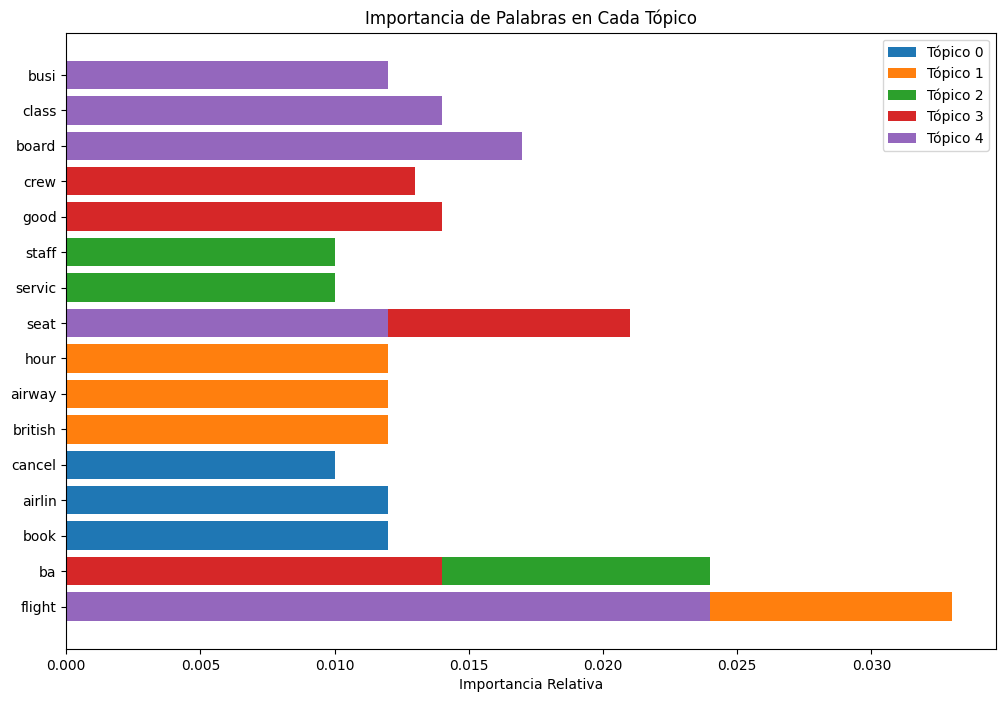

In [15]:
# Extraer información para graficar
topics_num = [topic[0] for topic in topics]
words_importance = [[(word.split('"')[1], float(word.split('*')[0])) for word in topic[1].split(' + ')] for topic in topics]

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
for i, topic in enumerate(words_importance):
    words, importance = zip(*topic)
    plt.barh(words, importance, label=f'Tópico {i}')

plt.xlabel('Importancia Relativa')
plt.title('Importancia de Palabras en Cada Tópico')
plt.legend()
plt.show()

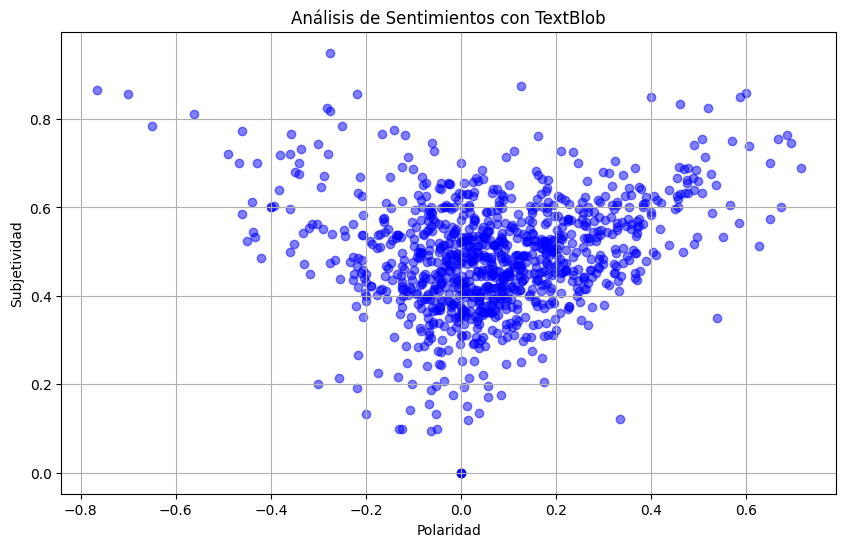

In [21]:
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment)

# Extraer polaridad y subjetividad como columnas separadas
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['sentiment'].apply(lambda x: x.subjectivity)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['polarity'], df['subjectivity'], color='blue', alpha=0.5)
plt.title('Análisis de Sentimientos con TextBlob')
plt.xlabel('Polaridad')
plt.ylabel('Subjetividad')
plt.grid(True)
plt.show()


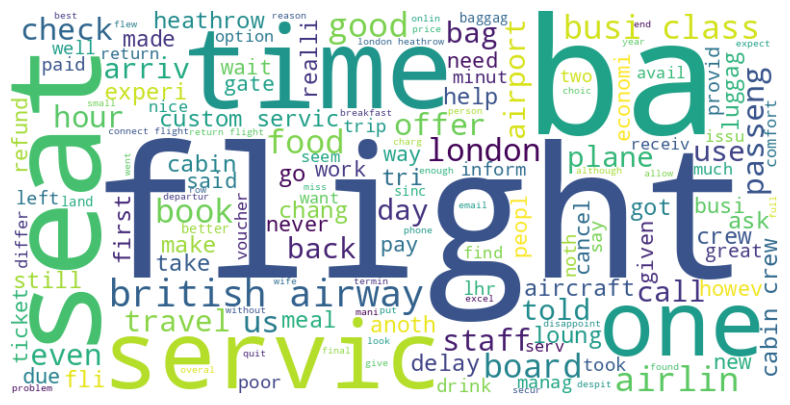

In [22]:
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(df['clean_review'].explode()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [19]:
df.head()

,Unnamed: 0,title,reviews,month,year,clean_review,sentiment
0,0,KLM is definitely a league over BA,BA is not what it used to be! As much as I lik...,3,2024,"[ba, use, much, like, onboard, crew, check, st...",0.104487
1,1,Service extremely inattentive,"BA First, it's not even the best business clas...",3,2024,"[ba, first, even, best, busi, class, sky, cabi...",0.012000
2,2,worst business class experience,The worst business class experience. Ground cr...,3,2024,"[worst, busi, class, experi, ground, crew, sin...",-0.019097
3,3,it's truly awful for short-haul,Quite possibly the worst business class I have...,3,2024,"[quit, possibl, worst, busi, class, ever, flow...",-0.021667
4,4,never be flying with BA again,I will never be flying with BA again. This is ...,3,2024,"[never, fli, ba, first, last, fli, singapor, t...",0.106034
